<a href="https://colab.research.google.com/github/stevemalsam/BeerDataAnalysis/blob/main/BeerDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An Exploratory Data Analysis of the Beer Advocate review data set, hosted on Kaggle. This seeks to see what kind of data we have in this data set, and what conclusions we might be able to draw from it.  

In [20]:
import kagglehub
from pathlib import Path
import shutil
import os

# Download latest version
initialDownloadPath = kagglehub.dataset_download("thedevastator/1-5-million-beer-reviews-from-beer-advocate")

print("Path to dataset files:", initialDownloadPath)

# move to our own directory
data_path = Path("datasets") / "beer_advocate_reviews"
data_path.mkdir(parents=True, exist_ok=True)


# Get a list of files in the initial download path
files_to_copy = os.listdir(initialDownloadPath)

# Copy each file to the data_path
for file_name in files_to_copy:
    source_path = os.path.join(initialDownloadPath, file_name)
    destination_path = os.path.join(data_path, file_name)

    # Use shutil.copy2 to preserve metadata
    shutil.copy2(source_path, destination_path)

print(f"Files copied from {initialDownloadPath} to {data_path}")


Path to dataset files: /kaggle/input/1-5-million-beer-reviews-from-beer-advocate
Files copied from /kaggle/input/1-5-million-beer-reviews-from-beer-advocate to datasets/beer_advocate_reviews


Load our data file and get a glimpse of what it looks like


In [25]:
import pandas as pd

beer_dataset = pd.read_csv(data_path / "beer_reviews.csv")
beer_dataset.head()

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [10]:
beer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


Lets see how many unique brewery names we have

In [11]:
beer_dataset["brewery_name"].value_counts()

,count
brewery_name,
Boston Beer Company (Samuel Adams),39444
Dogfish Head Brewery,33839
Stone Brewing Co.,33066
Sierra Nevada Brewing Co.,28751
"Bell's Brewery, Inc.",25191
...,...
Brauhaus Lemke,1
Sanford's Grub & Pub,1
Sillamäe Õlletehas,1


That is a lot of breweries!

Now lets see how many different styles we have

In [12]:
beer_dataset["beer_style"].value_counts()

,count
beer_style,
American IPA,117586
American Double / Imperial IPA,85977
American Pale Ale (APA),63469
Russian Imperial Stout,54129
American Double / Imperial Stout,50705
...,...
Gose,686
Faro,609
Roggenbier,466


That's pretty manageable.

Now, where are we missing data?

In [54]:
 # Check for missing values in the most important columns.
print("Missing Value Counts (Top 5):")
print(beer_dataset.isnull().sum().sort_values(ascending=False).head(5))

Missing Value Counts (Top 5):
beer_abv              67785
review_profilename      348
brewery_name             15
review_time               0
brewery_id                0
dtype: int64


The only two that would be important to us are beer_abv and brewery_name. The 15 records missing brewery_name can either be fixed by hand or dropped. beer_abv is a little trickier to handle, though.

In [56]:
print("\n[4] Top 10 Most Common Beer Styles:")
print(beer_dataset['beer_style'].value_counts().head(10))


[4] Top 10 Most Common Beer Styles:
beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
American Porter                      50477
American Amber / Red Ale             45751
Belgian Strong Dark Ale              37743
Fruit / Vegetable Beer               33861
American Strong Ale                  31945
Name: count, dtype: int64


While there is a decent mix of beer styles, it is a little top heavy with hoppy beers.

In [62]:
print("Top 10 Breweries by Number of Beers in Dataset:")
print(beer_dataset.groupby('brewery_id')['beer_beerid'].nunique().head(10))

beer_count_by_brewery = beer_dataset.groupby('brewery_id')['beer_beerid'].nunique()
display(beer_count_by_brewery.head())

# Merge the beer count by brewery with the original dataset to get brewery names
brewery_beer_counts_with_names = pd.merge(
    beer_count_by_brewery.reset_index(),
    beer_dataset[['brewery_id', 'brewery_name']].drop_duplicates(),
    on='brewery_id',
    how='left'
)

# Display the brewery name and the number of unique beers, sorted by beer count
display(brewery_beer_counts_with_names[['brewery_name', 'beer_beerid']].sort_values(by='beer_beerid', ascending=False).head(10))

Top 10 Breweries by Number of Beers in Dataset:
brewery_id
1     13
2      8
3     67
4     60
5     16
6     11
8     76
9     12
10     4
11    18
Name: beer_beerid, dtype: int64


,beer_beerid
brewery_id,
1,13
2,8
3,67
4,60
5,16


,brewery_name,beer_beerid
1048,Rock Bottom Restaurant & Brewery,855
1046,John Harvard's Brewery & Ale House,394
1047,Goose Island Beer Co.,368
2404,Iron Hill Brewery & Restaurant,316
879,Minneapolis Town Hall Brewery,312
2217,Port Brewing Company / Pizza Port,283
4459,Cigar City Brewing,201
3712,Mikkeller ApS,185
1256,Kuhnhenn Brewing Company,177
488,Flossmoor Station Restaurant & Brewery,158


Now to create our test set and our training set

In [28]:
IMAGE_PATH = Path(data_path) / "images"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGE_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

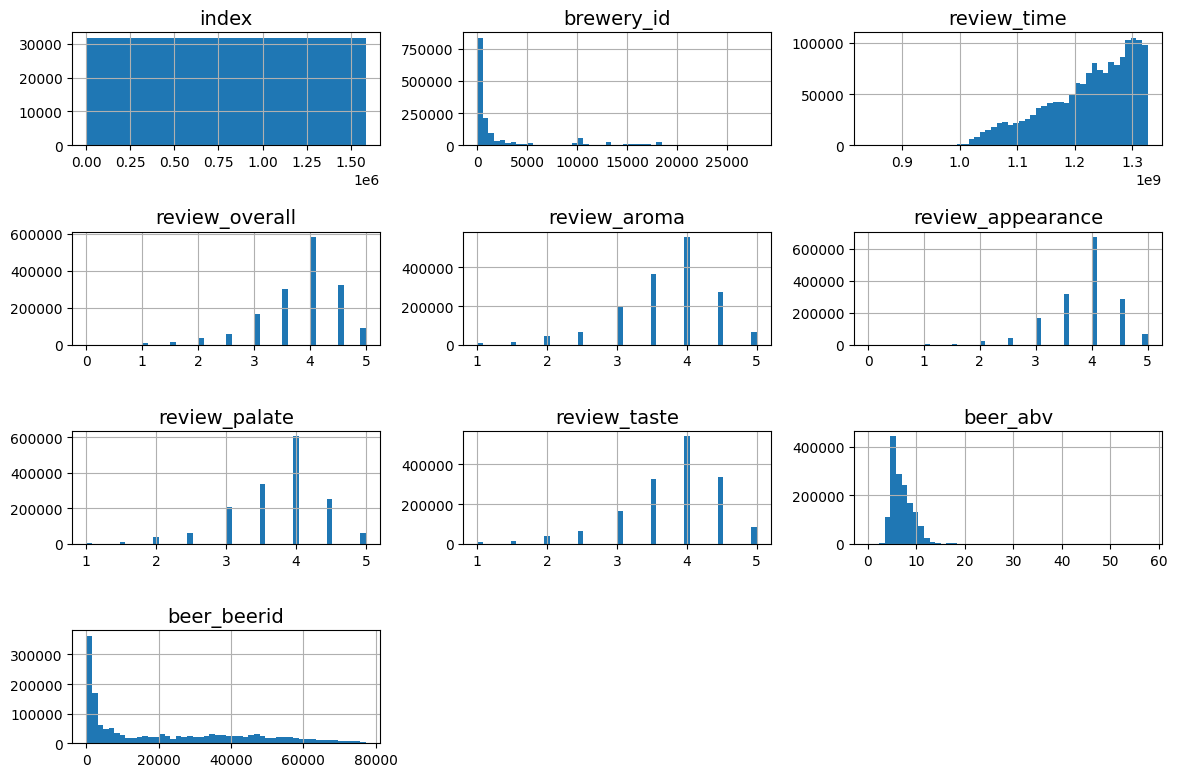

In [29]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

beer_dataset.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

Let's Make some more specific plots, which might have impact for developing an application which lets people rank beers

In [35]:
beer_dataset.groupby("beer_name")["review_overall"].count().sort_values(ascending=False).head(10)

,review_overall
beer_name,
90 Minute IPA,3290
India Pale Ale,3130
Old Rasputin Russian Imperial Stout,3111
Sierra Nevada Celebration Ale,3000
Two Hearted Ale,2728
Stone Ruination IPA,2704
Arrogant Bastard Ale,2704
Sierra Nevada Pale Ale,2587
Stone IPA (India Pale Ale),2575


In [37]:
reviews = pd.DataFrame(beer_dataset.groupby("beer_name")["review_overall"].mean())
reviews.head()

,review_overall
beer_name,
! (Old Ale),4.0
"""100""",4.0
"""100"" Pale Ale",4.0
"""12"" Belgian Golden Strong Ale",4.0
"""33"" Export",3.0


In [46]:
reviews["num_reviews"] = pd.DataFrame(beer_dataset.groupby("beer_name")["review_overall"].count())
reviews.head()

,review_overall,num_reviews
beer_name,,
! (Old Ale),4.0,1
"""100""",4.0,5
"""100"" Pale Ale",4.0,1
"""12"" Belgian Golden Strong Ale",4.0,2
"""33"" Export",3.0,3


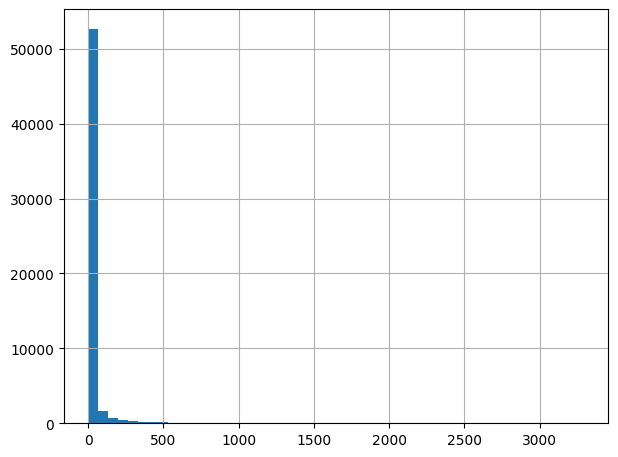

In [49]:

reviews["num_reviews"].hist(bins=50)
save_fig("reviews_by_beer")
plt.show()

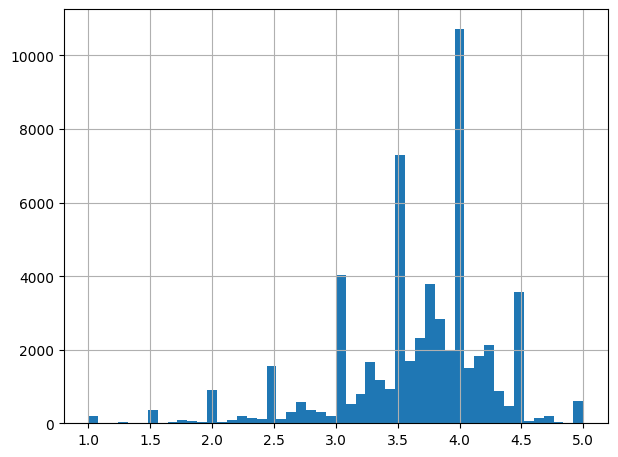

In [50]:
reviews["review_overall"].hist(bins=50)
save_fig("rating_by_beer")
plt.show()